In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import random
import plotly
import plotly.tools as tls

# Step 1. Data Preperation

Reduce the "business" dataset to business that are still open and extract businesses with "restaurant" in the category. Then removed unnecessary coulmns from dataset and rename dataset as "restaurant". After reducing the "business" dataset, "review" dataset was reduced by droping unnecessary columns and inner join the rest of "review" data to the "restaurant" dataset. 

Loading and exploring business.json

In [2]:
business = pd.read_json('C:../../Desktop/CIND820/yelp_data/yelp_academic_dataset_business.json', lines = True)

Group by cities to see the top 10 amount of records.

Keep the businesses that are still open, and set the city as Toronto

In [3]:
# 1 = open
business = business[business['is_open'] == 1]
print(business.shape)
business.head(5)

(168903, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."


Drop irrelevent columns

In [4]:
drop_cols = ['state', 'hours', 'is_open', 'postal_code', 'review_count', 'attributes']
business = business.drop(drop_cols, axis = 1)
business.head(5)

,business_id,name,address,city,latitude,longitude,stars,categories
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,35.462724,-80.852612,3.5,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,33.569404,-111.890264,5.0,"Health & Medical, Fitness & Instruction, Yoga,..."
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,45.479984,-73.580070,5.0,"Pets, Pet Services, Pet Groomers"
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,33.428065,-111.726648,4.5,"Home Services, Plumbing, Electricians, Handyma..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,33.350399,-111.827142,4.5,"Auto Repair, Automotive, Oil Change Stations, ..."


Keep only restaurants.

In [5]:
restaurant = business[business.categories.str.contains('Restaurants', case=False, na=False)]
print(restaurant.shape)
restaurant.head(5)

(43965, 8)


,business_id,name,address,city,latitude,longitude,stars,categories
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,40.110446,-88.233073,4.5,"Ethnic Food, Food Trucks, Specialty Food, Impo..."
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,44.010962,-79.448677,4.5,"Restaurants, Cheesesteaks, Poutineries"
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,43.820492,-79.398466,4.5,"Japanese, Fast Food, Food Court, Restaurants"
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,43.947011,-79.454862,3.0,"Persian/Iranian, Turkish, Middle Eastern, Rest..."
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,33.602822,-111.983533,4.0,"Food, Pretzels, Bakeries, Fast Food, Restaurants"


In [6]:
restaurant.groupby(['city']).size().nlargest(10)

city
Toronto        5462
Las Vegas      4378
Montr茅al       2885
Phoenix        2767
Calgary        2270
Charlotte      2032
Pittsburgh     1749
Mississauga    1253
Cleveland      1075
Scottsdale      947
dtype: int64

Loading and exploring review.json

In [7]:
path = 'C:../../Desktop/CIND820/yelp_data/yelp_academic_dataset_review.json'

In [8]:
def load_rows(filepath, nrows = None):
    with open(filepath, 'rb') as json_file:
        count = 0
        objs = []
        line = json_file.readline()
        while (nrows is None or count < nrows) and line:
            count += 1
            obj = json.loads(line)
            objs.append(obj)
            line = json_file.readline()
        return pd.DataFrame(objs)

In [9]:
reviews = load_rows('C:../../Desktop/CIND820/yelp_data/yelp_academic_dataset_review.json')
print('Review objects loaded. Count = {}'.format(reviews.shape[0]))

Review objects loaded. Count = 8021122


In [10]:
display(reviews.head(5))

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


Drop unnecessary columns, rename 'star' column to 'review_star' to avoid conflict with 'star' in restaurant

In [11]:
review = reviews[['user_id','business_id','stars','text']]
review = review.rename(columns = {'stars':'user_rating'})
display(review.head(5))

,user_id,business_id,user_rating,text
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,"As someone who has worked with many museums, I..."
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,I am actually horrified this place is still in...
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,I love Deagan's. I do. I really do. The atmosp...
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,"Oh happy day, finally have a Canes near my cas..."


Get number of users

In [12]:
review['user_id'].nunique()

1968703

Inner merge with edited restaurant file & check data type

In [13]:
merged = pd.merge(restaurant, review, on = 'business_id', how = 'inner')
print('Merged dataset loaded. Count = {}'.format(merged.shape[0]))
print(type(merged))

Merged dataset loaded. Count = 4222976
<class 'pandas.core.frame.DataFrame'>


Top 10 number of reviews by city

In [14]:
merged.groupby(['city']).size().nlargest(10)

city
Las Vegas     1253572
Phoenix        431877
Toronto        338328
Scottsdale     223350
Charlotte      220241
Pittsburgh     162549
Henderson      118805
Tempe          118052
Montr茅al       115659
Mesa            94982
dtype: int64

Limit the range to Toronto, then remove 'city' column

In [15]:
cleaned = merged[merged.city.str.contains('toronto', case=False, na=False)]
print('Cleaned dataset loaded. Count = {}'.format(cleaned.shape[0]))
drop_cols = ['city']
cleaned= cleaned.drop(drop_cols, axis = 1)
cleaned.head(10)

Cleaned dataset loaded. Count = 338363


,business_id,name,address,latitude,longitude,stars,categories,user_id,user_rating,text
120,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",aAd2DWIgvVLc2TeU8yve9A,5.0,Delicious delicous declicous!! It is my go-to ...
121,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",Zr535e3501Ygs4hO5hO05Q,4.0,"As a Vietnamese person, I highly recommend thi..."
122,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",20xtru4h_7TjFn4lSHmSsg,5.0,Been going to Mi Mi Restaurant for years! I lo...
123,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",wh9v2dIpOxm6W2mwoEnvPg,5.0,Our go-to place for Vietnamese food! This plac...
124,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",222kqiACWSwnpcxC0AaxFA,5.0,I honestly think that anyone would enjoy food ...
125,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",90B8GzGsz6fcgry_LFN4ug,5.0,Good Day to all reading my review of Mimi's Th...
126,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",2Va8pKWQLi4CtkrFY8an8A,4.0,the bun and fish sauce were awesome.\nthe pho ...
127,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",jZrbuGRk92uWTu5kHbnDXQ,4.0,"Nice service. Ordered vermicelli grilled pork,..."
128,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",UPvMHM1FJdfxiYJPJ-8J4w,5.0,"Best BBQ chicken and pork on rice, and nice se..."
129,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",Omhu17Pu7pGbO7KjbYLj1A,3.0,ordered a rice dish. the bbq pork chop and bon...


As the final cleaning up of the dataset, Null, NA, and duplicate values will be checked and removed. 

Recommender systems have a problem known as user cold-start, in which is hard do provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences. For this reason, we are keeping in the dataset only users with at least 5 reviews.

In [16]:
# keep users with more than 1 reviews
cleaned_df = cleaned[cleaned.groupby('user_id').user_id.transform(len) > 4]
cleaned_df.head()

,business_id,name,address,latitude,longitude,stars,categories,user_id,user_rating,text
121,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",Zr535e3501Ygs4hO5hO05Q,4.0,"As a Vietnamese person, I highly recommend thi..."
122,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",20xtru4h_7TjFn4lSHmSsg,5.0,Been going to Mi Mi Restaurant for years! I lo...
124,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",222kqiACWSwnpcxC0AaxFA,5.0,I honestly think that anyone would enjoy food ...
125,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",90B8GzGsz6fcgry_LFN4ug,5.0,Good Day to all reading my review of Mimi's Th...
126,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,43.666376,-79.348773,4.0,"Vietnamese, Restaurants",2Va8pKWQLi4CtkrFY8an8A,4.0,the bun and fish sauce were awesome.\nthe pho ...


In [17]:
# Check missing values
cleaned_df.isnull().sum()

business_id    0
name           0
address        0
latitude       0
longitude      0
stars          0
categories     0
user_id        0
user_rating    0
text           0
dtype: int64

In [18]:
cleaned_df.isna().sum()

business_id    0
name           0
address        0
latitude       0
longitude      0
stars          0
categories     0
user_id        0
user_rating    0
text           0
dtype: int64

In [19]:
cleaned_df[cleaned_df.duplicated()] # check duplicate

,business_id,name,address,latitude,longitude,stars,categories,user_id,user_rating,text
59050,ZpPOiNYi4AHNneI7uco7GQ,McSorley's Wonderful Saloon & Grill,1544 Bayview Avenue,43.704737,-79.375121,3.5,"Sports Bars, American (Traditional), Bars, Pub...",jpwc87McTVFCb3r6hI9igQ,4.0,Good nite at Mcsorleys. Easy. Good food & Serv...
78760,Gc8xWVpbUlBYHAoOT9MTyQ,La Cubana,92 Ossington Avenue,43.646208,-79.419674,4.0,"Sandwiches, Desserts, Food, Cuban, Restaurants",mnJvynzRIYptrjyKtEBiTA,5.0,Comfort food and I'm not even Latin. There's n...
88355,vnKHXrw585IOH4F3m29yFQ,Milagro,783 Queen St W,43.646126,-79.408170,3.5,"Mexican, Restaurants, Local Flavor, Latin Amer...",_SadovtH8RAjtQL4D6Jczw,5.0,"Home run ! Top notch Service, food and atmosph..."
92894,OQ9rVtBEFFI4jkdEo9AoRg,Loons Restaurant & Pub,416 Roncesvalles Avenue,43.651730,-79.451260,3.0,"Restaurants, Bars, American (Traditional), Nig...",hFSC_uJBy-iOlTnmv1hZyw,5.0,Amazing pub it's one of the best in the roncie...
97318,fUOY7g6JcO0m3iZNfK0O0g,Injapan,124 Atlantic Avenue,43.639731,-79.421297,3.5,"Restaurants, Sushi Bars, Japanese",BwaodS7fFDWrOZF32KtnHA,5.0,Every single time I get sushi here it is FRESH...
124317,QX5Y_BIxlMG3B3vV1zx1Gw,Cherry Street Bar-B-Que,275 Cherry Street,43.645599,-79.352298,4.0,"Restaurants, Barbeque",ky0Emup8gpdj2IJrgq9CKg,5.0,Yum.... truly the best BBQ I've had in the cit...
172315,qQsrcouREdFUk4adim1uEA,Mamajoun Armenian Pizzeria,"209 Ellesmere Road, Unit 6",43.760297,-79.302782,4.5,"Bakeries, Pizza, Restaurants, Sandwiches, Fast...",eV5usRjY2cDqNKVv8wXroA,3.0,I've eaten here a couple of times now and I'm ...
177063,28adZ4lsuUeVB2aWzohK9g,Prohibition Gastrohouse - Queen,696 Queen Street E,43.658895,-79.350384,3.5,"Bars, Food, Gastropubs, Pubs, Beer, Wine & Spi...",9y3nfjP4lQVTh3k0enxojA,3.0,These guys have a solid place. They were final...
197543,h_4dPV9M9aYaBliH1Eoeeg,Wvrst,609 King Street W,43.644186,-79.401015,4.0,"Canadian (New), Nightlife, Pubs, Restaurants, ...",tVR1J5N9NJLLl2j1eFFdFA,4.0,I had the Oktoberfest sausage and duck fat fri...
237456,JtrBa5-T6QLXv3y5_ACTkg,Doo Roo Ae,659 Bloor Street West,43.664074,-79.415611,4.0,"Korean, Restaurants",G21DPskg74y68OGesZE--Q,5.0,The bbq is really good and the price is perfec...


In [20]:
cleaned_df = cleaned_df.drop_duplicates() # remove duplicate 
print("Number of record in 'cleaned_df' dataset = {}".format(cleaned_df.shape[0]))

Number of record in 'cleaned_df' dataset = 219410


In [21]:
cleaned_df['user_id'].nunique()

13927

In [22]:
#check number of records
print("Number of record in 'cleaned_df' dataset = {}".format(cleaned_df.shape[0]))
# verify the minimum amount of user_id counts
print('The minimum amount of reviews per user is {}'.format(np.min(cleaned_df.groupby('user_id')['business_id'].count())))

Number of record in 'cleaned_df' dataset = 219410
The minimum amount of reviews per user is 4


Convert the new data frame into a CSV file

In [23]:
csv_name = "yelp_restaurant_review.csv"
cleaned_df.to_csv(csv_name, index=False)

# Step 2. EDA

Plot a diagram of star distribution

In [24]:
T_rest = restaurant[restaurant.city.str.contains('toronto', case=False, na=False)]
# print(T_star)
x = T_rest['stars'].value_counts().sort_index()
print(x)

1.0      35
1.5     107
2.0     281
2.5     511
3.0     915
3.5    1432
4.0    1418
4.5     649
5.0     115
Name: stars, dtype: int64


Text(0.5, 1.0, 'Restaurant Star Distribution')

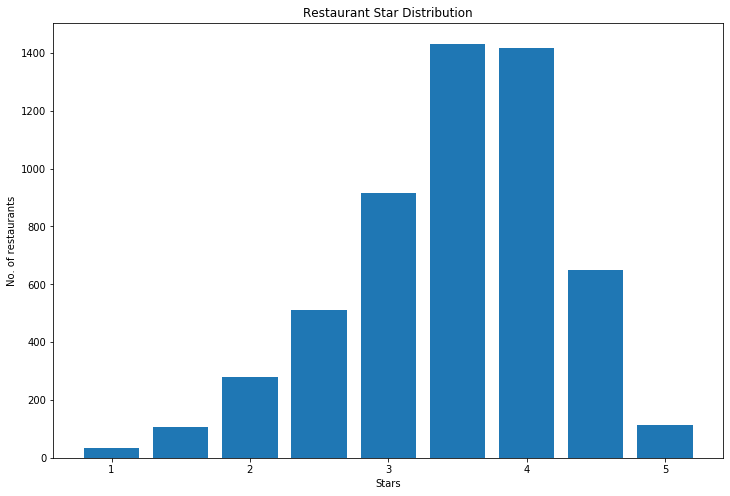

In [25]:
# plot
fig = plt.figure(figsize=(12, 8))
plt.bar(x.index, x, width = 0.4)
plt.xlabel("Stars") 
plt.ylabel("No. of restaurants") 
plt.title("Restaurant Star Distribution") 

In [26]:
# category = restaurant.assign(restaurant.categories.str.split(',').explode('categories'))
res_category = ''.join(T_rest['categories'].astype('str'))
category = pd.DataFrame(res_category.split(','), columns=['categories'])
x = category.categories.value_counts().sort_values(ascending = False)
print(x, type(x))

 Restaurants                  2255
 Food                          968
 Bars                          527
 Nightlife                     521
 RestaurantsRestaurants        463
                              ... 
 PortugueseModern European       1
 Beauty & SpasFood               1
 CafesIndonesian                 1
 Fast FoodCoffee & Tea           1
 Chicken ShopBurgers             1
Name: categories, Length: 2450, dtype: int64 <class 'pandas.core.series.Series'>


we want to see the attributes other than 'Restaurants', 'Food', and 'RestaurantsRestaurants'

In [27]:
x = x.drop(index = [' Restaurants', ' Food', ' RestaurantsRestaurants'])
y = x.iloc[0:10]

Top 10 most popular attributes of restaurant in Toronto

Text(0.5, 1.0, 'Top 10 Attributes of Restaurants in Toronto')

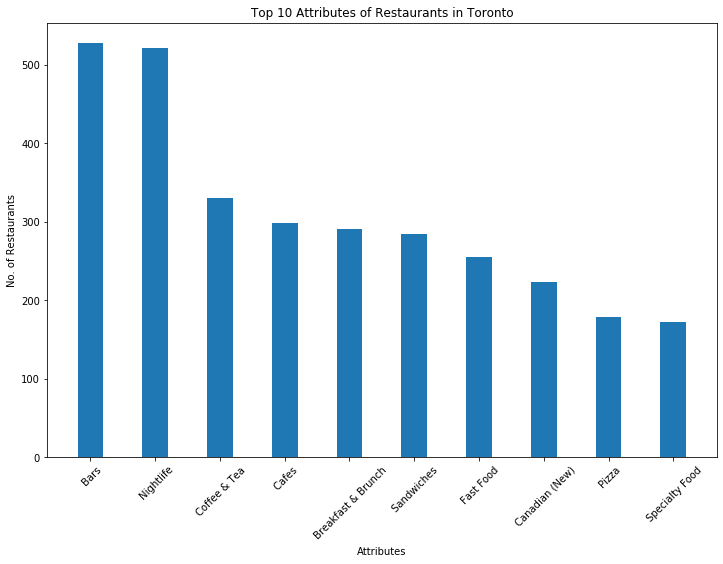

In [28]:
fig = plt.figure(figsize=(12, 8))
plt.bar(y.index, y, width = 0.4)
plt.xlabel("Attributes")
plt.xticks(rotation = 45)
plt.ylabel("No. of Restaurants") 
plt.title("Top 10 Attributes of Restaurants in Toronto") 

Top 10 restaurants that have the most number of reviews in Toronto

In [29]:
a = cleaned['name'].value_counts().sort_values(ascending = False).iloc[0:10]
a

Pai Northern Thai Kitchen            2834
Banh Mi Boys                         1747
KINKA IZAKAYA ORIGINAL               1618
Khao San Road                        1603
Seven Lives Tacos Y Mariscos         1317
The Burger's Priest                  1290
Terroni                              1288
KINTON RAMEN                         1207
La Carnita                           1154
Uncle Tetsu's Japanese Cheesecake    1100
Name: name, dtype: int64

Text(0.5, 1.0, 'Top 10 Restaurants with the most reviews in Toronto')

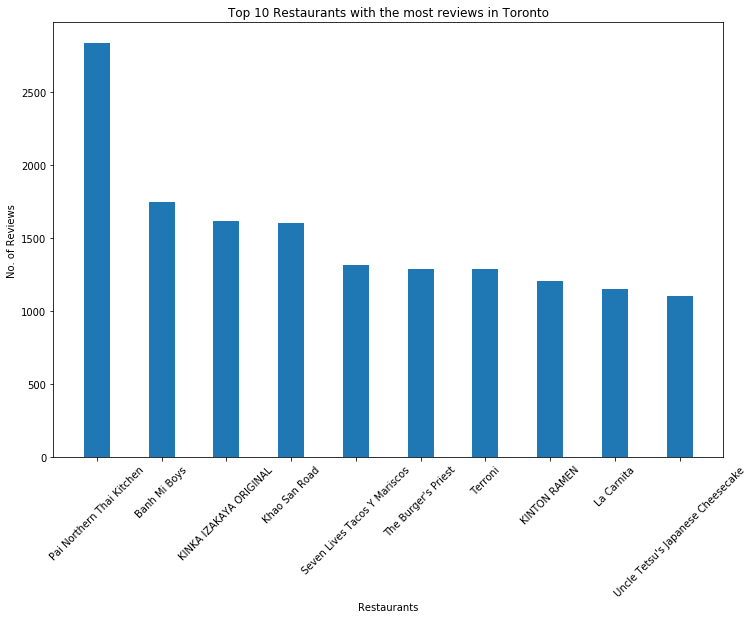

In [30]:
fig = plt.figure(figsize=(12, 8))
plt.bar(a.index, a, width = 0.4)
plt.xlabel("Restaurants")
plt.xticks(rotation = 45)
plt.ylabel("No. of Reviews") 
plt.title("Top 10 Restaurants with the most reviews in Toronto")

Step 3. Split training and testing sets

In [31]:
# t_data -> cleaned data for Toronto
t_data = cleaned_df[['user_id', 'business_id', 'user_rating']]
t_data.head()

,user_id,business_id,user_rating
121,Zr535e3501Ygs4hO5hO05Q,0QjROMVW9ACKjhSEfHqNCQ,4.0
122,20xtru4h_7TjFn4lSHmSsg,0QjROMVW9ACKjhSEfHqNCQ,5.0
124,222kqiACWSwnpcxC0AaxFA,0QjROMVW9ACKjhSEfHqNCQ,5.0
125,90B8GzGsz6fcgry_LFN4ug,0QjROMVW9ACKjhSEfHqNCQ,5.0
126,2Va8pKWQLi4CtkrFY8an8A,0QjROMVW9ACKjhSEfHqNCQ,4.0


In [32]:
n_users = t_data.user_id.unique().shape[0] # total number of users
n_items = t_data.business_id.unique().shape[0] # total number of businesses
print("n_users = {}, n_items = {}".format(n_users, n_items))

n_users = 13927, n_items = 5418


In [33]:
import sklearn
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(t_data, test_size = 0.3, stratify = t_data['user_id'])
print("size of train_data = {}\nsize of test_data = {}".format(len(train_data), len(test_data)))
print(type(train_data))

size of train_data = 153587
size of test_data = 65823
<class 'pandas.core.frame.DataFrame'>


## Memory-Based Collaborative Filtering

To implement a Memory Based CF, a user-item matrix is created, so the similarity between two users or two items can be calculated. For items, the similarity of ratings will be looked. For users, all the items that are rated by users and how much their rating are similar will be looked. After that, similarity matrics for item-item and user-user are obtained, leading to item-item CF and user-item CF respectively. To calculate the similarity, we used cosine similarity. We consider the ratings as vectors in n-dimensional space, and calculate the angle between these vectors to determine the similarity.

Create user-item matrics for training and testing dataset

In [34]:
item_list = t_data['business_id'].unique() #train_data
user_list = t_data['user_id'].unique() #train_data
print("size of item_list = {}\nsize of user_list = {}".format(len(item_list), len(user_list)))
print(type(item_list))

size of item_list = 5418
size of user_list = 13927
<class 'numpy.ndarray'>


Construct matrics for training and testing dataset

In [35]:
# training
train_matrix = np.zeros((n_users, n_items)) 
#train_matrix = np.zeros((len(user_list), len(item_list))) 
train_matrix = pd.DataFrame(train_matrix, columns = item_list, index = user_list)
for line in train_data.itertuples():
    train_matrix.loc[line[1],line[2]] = line[3]

In [36]:
# testing
test_matrix = np.zeros((n_users, n_items))
#test_matrix = np.zeros((len(user_list), len(item_list)))
test_matrix = pd.DataFrame(test_matrix, columns = item_list, index = user_list)
for line in test_data.itertuples():
    test_matrix.loc[line[1],line[2]] = line[3]

In [37]:
train_matrix.head()

,0QjROMVW9ACKjhSEfHqNCQ,8k62wYhDVq1-652YbJi5eg,0DnQh8SE8BSnvJltGCCiWg,NLaK58WvlNQdUunSIkt-jA,cicPsia8Wj-DNRkmLbD_xg,0nqQIM2PvOcTX6v0L537_Q,xVXyrTWbG8U3szze-aA7eg,TKKX9bllRBMzp0NYr441PQ,37kk0IW6jL7ZlxZF6k2QBg,0rMFhLzeq3Z2OaJ62MQXlw,...,lkq6i2x3vUsR7ZNrIFqoIw,9F_3PA1QBQ3aGI2RW2zMtw,6R4GzPhlFS1n_xCO7U7Gcw,2auigv5pF08RjJ8CL1dIVw,sS8uO7UuWcW_17AMga4yKg,thzyiQZb16zD8wMliaEfRQ,eUi3O-8Gqh_nJ_ZhO-25gQ,yFQCdWr_k1pTObzHPGis9Q,GAgEoHcf4PSuZRS5Zd3ltA,n2BKYb8aw4AhRKLkdUjQRg
Zr535e3501Ygs4hO5hO05Q,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20xtru4h_7TjFn4lSHmSsg,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222kqiACWSwnpcxC0AaxFA,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90B8GzGsz6fcgry_LFN4ug,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Va8pKWQLi4CtkrFY8an8A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
train_matrix.to_csv("train_matrix.csv")

To make predictions by computing the similarities for all of the user-user and restaurant-restaurant pairs, the similarity matrix for users and restaurants can be constructed by using 'pairwise distance' function from 'sklearn'.

For the memory-based collaborative filtering, we have two ways to make predictions. The first is based on the similarities between users. To predict user similarity, the weighted average of the ratings from all the users to the restarant was computed, with the similarities between users as the weights.

Since some users tend to always give higher or lower ratings, the substraction of average rating from each user were made to eliminate the bias.

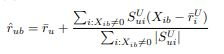

The second way to make prediction is based on the item-item (restaurant-restaurant) similarities, but it is not necessary to do the substraction to eliminate bias as the user-user similarity matrix above. 

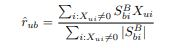

Use 'pairwise distance' function from 'sklearn' to calculate the cosine similarity

In [39]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix, metric = 'cosine')
item_similarity = pairwise_distances(train_matrix.T, metric = 'cosine')
# print("user_similarity:", user_similarity)
# print("item_similarity:", item_similarity)

In [40]:
def predict(rating, similarity, type='user'):
    if type == 'user':
        avg_rating = rating.mean(axis=1) # calculate average ratings for each user, remove bias
        rating_diff = (rating - avg_rating[:, np.newaxis]) #np.newaxis make avg_rating has same format as rating
        pred = avg_rating[:,np.newaxis] + similarity.dot(rating_diff)/np.array([np.abs(similarity).sum(axis = 1)]).T
    elif type == 'item':
        pred = rating.dot(similarity)/np.array([np.abs(similarity).sum(axis = 1)])
    return pred

In [41]:
item_prediction = predict(train_matrix, item_similarity, type='item')
user_prediction = predict(train_matrix, user_similarity, type='user')

In [42]:
# train_matrix.mean(axis = 1)

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from math import sqrt
def rmse(test, prediction):
    return sqrt(mean_squared_error(test, prediction))
def mae(test, prediction):
    return mean_absolute_error(test, prediction)

In [44]:
trainRMSE = []
testRMSE = []

user_TrainRMSE = rmse(train_matrix, user_prediction)
user_TestRMSE = rmse(test_matrix, user_prediction)
trainRMSE.append(user_TrainRMSE)
testRMSE.append(user_TestRMSE)

item_TrainRMSE = rmse(train_matrix, item_prediction)
item_TestRMSE = rmse(test_matrix, item_prediction)
trainRMSE.append(item_TrainRMSE)
testRMSE.append(item_TestRMSE)

print('User-based CF training RMSE: ' + str(user_TrainRMSE))
print('Item-based CF training RMSE: ' + str(item_TrainRMSE))
print('User-based CF testing RMSE: ' + str(user_TestRMSE))
print('Item-based CF testing RMSE: ' + str(item_TestRMSE))

User-based CF training RMSE: 0.17080931957378923
Item-based CF training RMSE: 0.17127371076509687
User-based CF testing RMSE: 0.11342850521733047
Item-based CF testing RMSE: 0.11331664465513204


In [45]:
trainMAE = []
testMAE = []

user_TrainMAE = mae(train_matrix, user_prediction)
user_TestMAE = mae(test_matrix, user_prediction)
trainMAE.append(user_TrainMAE)
testMAE.append(user_TestMAE)

item_TrainMAE = mae(train_matrix, item_prediction)
item_TestMAE = mae(test_matrix, item_prediction)
trainMAE.append(item_TrainMAE)
testMAE.append(item_TestMAE)

print('User-based CF training MAE: ' + str(user_TrainMAE))
print('Item-based CF training MAE: ' + str(item_TrainMAE))
print('User-based CF testing MAE: ' + str(user_TestMAE))
print('Item-based CF testing MAE: ' + str(item_TestMAE))

User-based CF training MAE: 0.01656467672673349
Item-based CF training MAE: 0.014494279351223403
User-based CF testing MAE: 0.012530822400096026
Item-based CF testing MAE: 0.010412492806555563


## Model-Based Collaborative Filtering

Model-based Collaborative Filtering is based on matrix factorization, which mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF.

The goal of MF method for the Yelp dataset is to learn the latent preferences of users and the latent attributes of items from known ratings. A prediction of unknown ratings will be made by conducting dot product of the latent features of users and items. If the matrix has a large sparcity and scale, by doing matrix factorization which restructure the user-item matrix into two low rank matrices and allows filling in the original matrix; it predicts unknown ratings by taking the dot product of the two low rank matrices of users or items. For implementing matrix factorization, we used singular value decomposition (SVD). SVD is solved as follows:

$$ SVD(A) = U * \sum * V^T $$

 - U and V are m x m and n x n matrices orthogonal matrices respectively
 - $ \sum$ is the m x n singular orthogonal matrix with non-negative elements

In [46]:
sparsity = round(1-len(cleaned_df) / float(n_users*n_items),3)
print('The sparsity level of the Dataset is ', sparsity*100, '%')

The sparsity level of the Dataset is  99.7 %


In [47]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_matrix, k = 10)
s_diag_matrix=np.diag(s)
SVD_pred = np.dot(np.dot(u, s_diag_matrix), vt)

SVD_TrainRMSE = rmse(train_matrix, SVD_pred)
SVD_TestRMSE = rmse(test_matrix, SVD_pred)
trainRMSE.append(SVD_TrainRMSE)
testRMSE.append(SVD_TestRMSE)
print('SVD training RMSE:' + str(SVD_TrainRMSE))
print('SVD testing RMSE:' + str(SVD_TestRMSE))

SVD_TrainMAE = mae(train_matrix, SVD_pred)
SVD_TestMAE = mae(test_matrix, SVD_pred)
trainMAE.append(SVD_TrainMAE)
testMAE.append(SVD_TestMAE)
print('SVD training MAE:' + str(SVD_TrainMAE))
print('SVD testing MAE:' + str(SVD_TestMAE))

SVD training RMSE:0.16572897086737315
SVD testing RMSE:0.11836813402607362
SVD training MAE:0.015489277286060553
SVD testing MAE:0.012126305715336183


RMSE in the model based CF is not any better than the memory based model. Another big issue with the matrix factorization approach is that it does not work well with missing data. Yelp dataset that is considered in this script has no Nan/missing values and thus the SVD worked. But in real-life scenario that is hardly the case.

## Text-Based Model

In [48]:
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer # convert words to count vector
from sklearn.feature_extraction.text import TfidfTransformer # used to pipe line 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import string

%matplotlib inline

In [49]:
text_base = cleaned_df[['business_id', 'user_id', 'user_rating', 'text']]

For text based analysis, we need to remove all punctuations and stopwords. Then we can get word frequency and make some preparations for further building up model.

In [50]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

All Stars Word Frequency and Word Cloud

In [51]:
yelp_text_allstars = text_base.copy()
yelp_text_allstars['text'] = yelp_text_allstars['text'].apply(remove_punc_stopword)
yelp_text_allstars.count()

business_id    219410
user_id        219410
user_rating    219410
text           219410
dtype: int64

In [52]:
yelp_text_allstars.head()

,business_id,user_id,user_rating,text
121,0QjROMVW9ACKjhSEfHqNCQ,Zr535e3501Ygs4hO5hO05Q,4.0,"[vietnamese, person, highly, recommend, place,..."
122,0QjROMVW9ACKjhSEfHqNCQ,20xtru4h_7TjFn4lSHmSsg,5.0,"[going, mi, mi, restaurant, years, love, place..."
124,0QjROMVW9ACKjhSEfHqNCQ,222kqiACWSwnpcxC0AaxFA,5.0,"[honestly, think, anyone, would, enjoy, food, ..."
125,0QjROMVW9ACKjhSEfHqNCQ,90B8GzGsz6fcgry_LFN4ug,5.0,"[good, day, reading, review, mimis, thai, rest..."
126,0QjROMVW9ACKjhSEfHqNCQ,2Va8pKWQLi4CtkrFY8an8A,4.0,"[bun, fish, sauce, awesome, pho, beef, disappo..."


Plot 30 most frequent words from reviews

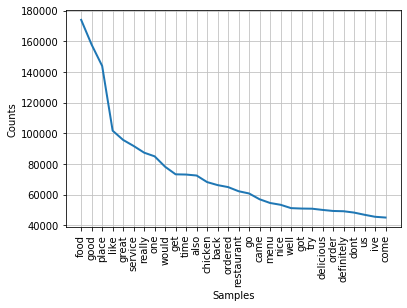

In [53]:
from nltk.probability import FreqDist
words_split = []

for i in range(0,219410): 
    for word in yelp_text_allstars['text'].iloc[i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

In [54]:
yelp_allstars_text = yelp_text_allstars['text'].values
#yelp_allstars_text

In [55]:
# pip install wordcloud

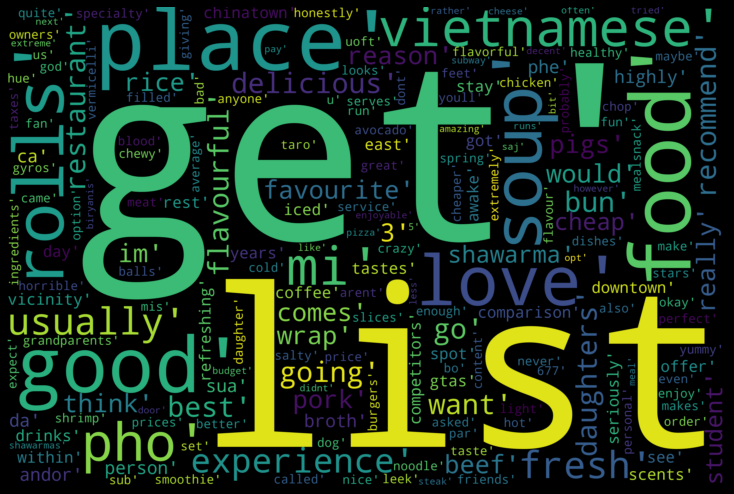

In [56]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

Currently, what we have is 'text', which cannot be recoganized by machine learning model. We need to transfer those texts to vectors that can be used in machine learning model. What's more, let's first build up a machine learning model without using TF-IDF (term frequency-inverse document frequency). The tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

## NLP Model (without TF-IDF)

In [57]:
text = cleaned_df['text']
rating = cleaned_df['user_rating']
cv = CountVectorizer()
text = cv.fit_transform(text)

text_train, text_test, rating_train, rating_test = train_test_split(text, rating, test_size=0.3)
model = MultinomialNB()
model.fit(text_train,rating_train)

train_prediction = model.predict(text_train)
test_prediction = model.predict(text_test)

text_TrainRMSE = rmse(rating_train, train_prediction)
text_TestRMSE = rmse(rating_test, test_prediction)
trainRMSE.append(text_TrainRMSE)
testRMSE.append(text_TestRMSE)
print('Text based model without TDIDF training RMSE:' + str(text_TrainRMSE))
print('Text based model without TDIDF testing RMSE:' + str(text_TestRMSE))

text_TrainMAE = mae(rating_train, train_prediction)
text_TestMAE = mae(rating_test, test_prediction)
trainMAE.append(text_TrainMAE)
testMAE.append(text_TestMAE)
print('Text based model without TDIDF training MAE:' + str(text_TrainMAE))
print('Text based model without TDIDF testing MAE:' + str(text_TestMAE))

Text based model without TDIDF training RMSE:0.7721838597769017
Text based model without TDIDF testing RMSE:0.8400207190906588
Text based model without TDIDF training MAE:0.43443129952404824
Text based model without TDIDF testing MAE:0.5230542515534083


In [58]:
print(classification_report(rating_test, test_prediction))

              precision    recall  f1-score   support

         1.0       0.57      0.55      0.56      4104
         2.0       0.41      0.32      0.36      6306
         3.0       0.49      0.49      0.49     13798
         4.0       0.56      0.60      0.58     24116
         5.0       0.62      0.61      0.62     17499

    accuracy                           0.55     65823
   macro avg       0.53      0.51      0.52     65823
weighted avg       0.55      0.55      0.55     65823



Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), which is the number of times a word appears in a document, divided by the total number of words in that document, measuring how frequently a term occures in document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears, measuring how important a term is.

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = cleaned_df['text']
rating = cleaned_df['user_rating']

#tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True).fit(text)
#text = tfidf_transformer.transform(text)

tfidf_vectorizer = TfidfVectorizer()
text=tfidf_vectorizer.fit_transform(text)

text_train, text_test, rating_train, rating_test = train_test_split(text, rating, test_size=0.3)
model = MultinomialNB()
model.fit(text_train,rating_train)

train_prediction = model.predict(text_train)
test_prediction = model.predict(text_test)

text_TFIDF_TrainRMSE = rmse(rating_train, train_prediction)
text_TFIDF_TestRMSE = rmse(rating_test, test_prediction)
trainRMSE.append(text_TFIDF_TrainRMSE)
testRMSE.append(text_TFIDF_TestRMSE)
print('Text based model with TDIDF training RMSE:' + str(text_TFIDF_TrainRMSE))
print('Text based model with TDIDF testing RMSE:' + str(text_TFIDF_TestRMSE))

text_TFIDF_TrainMAE = mae(rating_train, train_prediction)
text_TFIDF_TestMAE = mae(rating_test, test_prediction)
trainMAE.append(text_TFIDF_TrainMAE)
testMAE.append(text_TFIDF_TestMAE)
print('Text based model with TDIDF training MAE:' + str(text_TFIDF_TrainMAE))
print('Text based model with TDIDF testing MAE:' + str(text_TFIDF_TestMAE))

Text based model with TDIDF training RMSE:1.146087308149167
Text based model with TDIDF testing RMSE:1.1517562216007429
Text based model with TDIDF training MAE:0.7896957424782045
Text based model with TDIDF testing MAE:0.8080002430761284


Method 2. Using Pipeline model.

In [60]:
#rating_train.shape

In [61]:
#text_train.shape

In [62]:
pipe = Pipeline([('bagofwords',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])

text = cleaned_df['text']
rating = cleaned_df['user_rating']
text_train, text_test, rating_train, rating_test = train_test_split(text, rating, test_size=0.3)

pipe.fit(text_train, rating_train)
predict = pipe.predict(text_test)
print(classification_report(rating_test, predict))

              precision    recall  f1-score   support

         1.0       0.88      0.01      0.03      4100
         2.0       0.31      0.00      0.00      6364
         3.0       0.19      0.03      0.05     13633
         4.0       0.39      0.98      0.55     24101
         5.0       0.81      0.15      0.25     17625

    accuracy                           0.40     65823
   macro avg       0.51      0.23      0.18     65823
weighted avg       0.48      0.40      0.28     65823



# Performance Plot

In [63]:
model = ['User CF','Item CF','SVD','Text(without TFIDF)', 'Text(with TFIDF)']
RMSE = {'model':model, 'trainRMSE': trainRMSE, 'testRMSE': testRMSE}
RMSE = pd.DataFrame(RMSE)
RMSE

,model,trainRMSE,testRMSE
0,User CF,0.170809,0.113429
1,Item CF,0.171274,0.113317
2,SVD,0.165729,0.118368
3,Text(without TFIDF),0.772184,0.840021
4,Text(with TFIDF),1.146087,1.151756


In [64]:
MAE = {'model':model, 'trainMAE': trainMAE, 'testMAE': testMAE}
MAE = pd.DataFrame(MAE)
MAE

,model,trainMAE,testMAE
0,User CF,0.016565,0.012531
1,Item CF,0.014494,0.010412
2,SVD,0.015489,0.012126
3,Text(without TFIDF),0.434431,0.523054
4,Text(with TFIDF),0.789696,0.808000


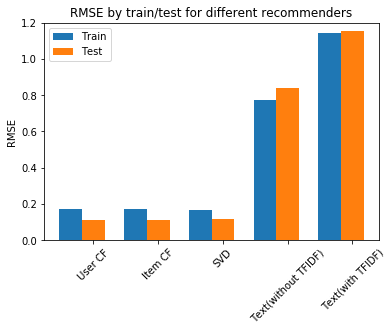

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars
 
## the bars
rects1 = ax.bar(ind, trainRMSE, width)
rects2 = ax.bar(ind+width, testRMSE, width)
 
# axes and labels
#ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1.2)
ax.set_ylabel('RMSE')
ax.set_title('RMSE by train/test for different recommenders')
xTickMarks = model
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )
plt.show()


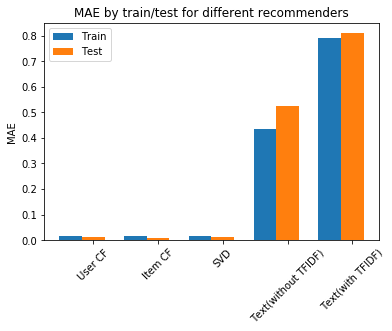

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
## the bars
rects1 = ax.bar(ind, trainMAE, width)
rects2 = ax.bar(ind+width, testMAE, width)
 
# axes and labels
#ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.85)
ax.set_ylabel('MAE')
ax.set_title('MAE by train/test for different recommenders')
xTickMarks = model
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )
plt.show()